In [ ]:
# ===============================
# 🌧️ Rainfall DS Analysis Project
# Step 1: Import libraries & Load dataset
# ===============================

# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning & Deep Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# ===============================
# Load Dataset
# ===============================
df = pd.read_csv("/content/cleaned_DS_Dataset1_asuma.csv")

print("✅ Data Loaded Successfully")
print(f"Shape: {df.shape}")
print("\nColumns:", df.columns.tolist())

# Display first 5 rows
df.head()


✅ Data Loaded Successfully
Shape: (151139, 10)

Columns: ['_id', 'id', 'date', 'state_code', 'state_name', 'district_code', 'district_name', 'actual', 'rfs', 'normal']


,_id,id,date,state_code,state_name,district_code,district_name,actual,rfs,normal
0,1631625,1631624,01-04-2009,27,Maharashtra,472,Buldhana,0.000000,0.100000,0.0
1,1631626,1631625,01-04-2009,27,Maharashtra,477,Hingoli,0.000000,3.445711,0.0
2,1631627,1631626,01-04-2009,27,Maharashtra,500,Yavatmal,0.000000,0.300000,0.0
3,1631628,1631627,01-04-2009,27,Maharashtra,485,Nanded,0.000000,0.600000,0.0
4,1631629,1631628,01-04-2009,27,Maharashtra,495,Sindhudurg,0.176205,0.000000,1.0


In [ ]:
# ===============================
# Step 2: Data Cleaning & Preprocessing
# ===============================

# Drop unnecessary ID columns
df = df.drop(columns=['_id', 'id'])

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')

# Check for null values
print("🧭 Missing Values Before Cleaning:")
print(df.isnull().sum())

# Handle missing values if any (for now fill numeric with mean)
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Drop duplicate rows (if any)
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]
print(f"\n🧹 Duplicates Removed: {before - after}")

# Confirm datatypes and quick info
print("\n📋 Data Types After Cleaning:")
print(df.dtypes)

# Summary of numeric columns
print("\n📊 Summary of Numeric Columns:")
print(df.describe())

# Display few rows
df.head()


🧭 Missing Values Before Cleaning:
date             0
state_code       0
state_name       0
district_code    0
district_name    0
actual           0
rfs              0
normal           0
dtype: int64

🧹 Duplicates Removed: 0

📋 Data Types After Cleaning:
date             datetime64[ns]
state_code                int64
state_name               object
district_code             int64
district_name            object
actual                  float64
rfs                     float64
normal                  float64
dtype: object

📊 Summary of Numeric Columns:
                                date  state_code  district_code  \
count                         151139    151139.0  151139.000000   
mean   2015-03-23 23:17:18.966778880        27.0     483.000000   
min              2009-01-20 00:00:00        27.0     466.000000   
25%              2012-04-10 00:00:00        27.0     474.000000   
50%              2015-03-26 00:00:00        27.0     483.000000   
75%              2018-03-09 00:00:00       

,date,state_code,state_name,district_code,district_name,actual,rfs,normal
0,2009-04-01,27,Maharashtra,472,Buldhana,0.000000,0.100000,0.0
1,2009-04-01,27,Maharashtra,477,Hingoli,0.000000,3.445711,0.0
2,2009-04-01,27,Maharashtra,500,Yavatmal,0.000000,0.300000,0.0
3,2009-04-01,27,Maharashtra,485,Nanded,0.000000,0.600000,0.0
4,2009-04-01,27,Maharashtra,495,Sindhudurg,0.176205,0.000000,1.0


📈 Basic Rainfall Stats:
              actual            rfs         normal
count  151139.000000  151139.000000  151139.000000
mean        0.944269       3.445711       3.579783
std         3.033758       5.887285      11.533376
min         0.000000       0.000000       0.000000
25%         0.000000       0.100000       0.000000
50%         0.000000       0.800000       0.000000
75%         0.330037       4.400000       1.440000
max        71.321713      51.600000     271.790000


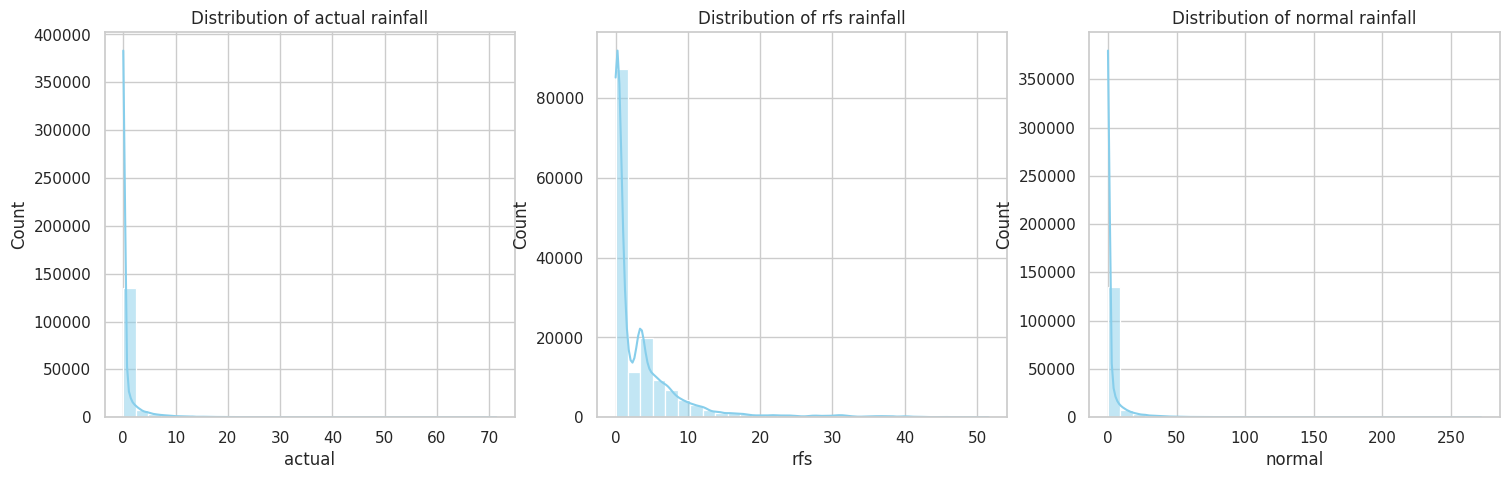

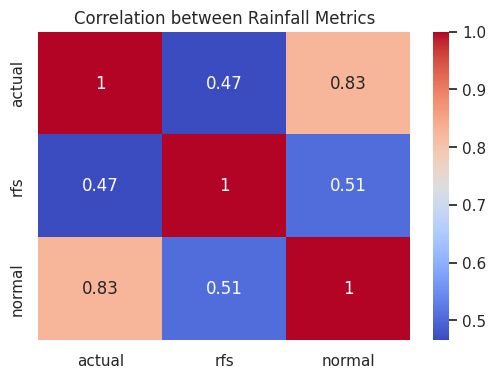

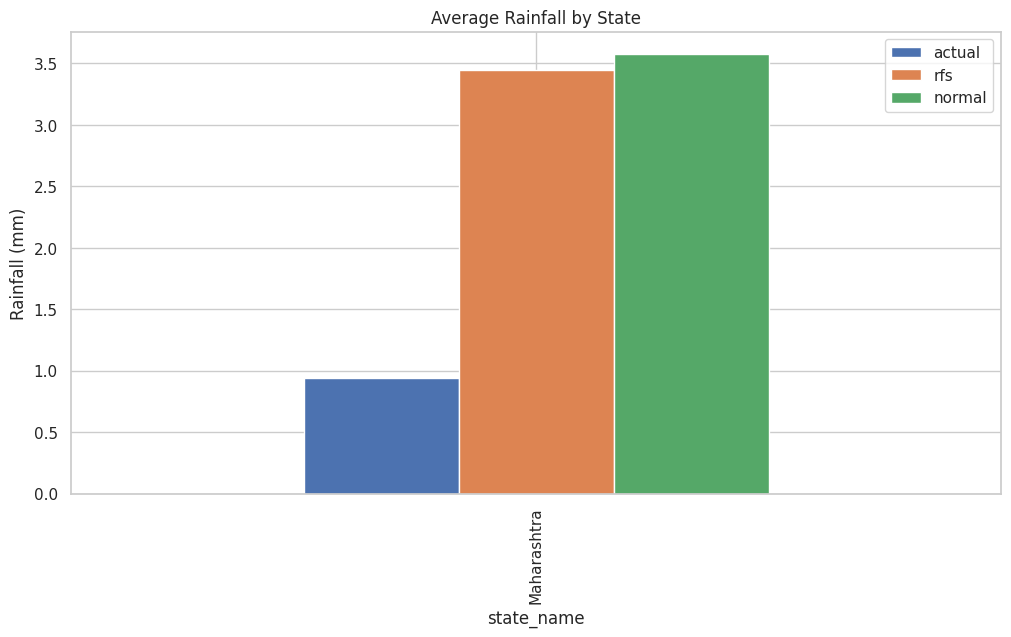

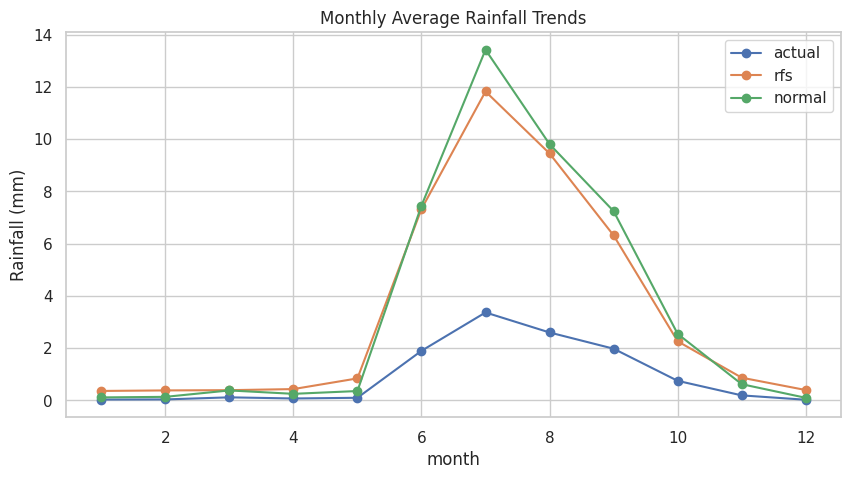

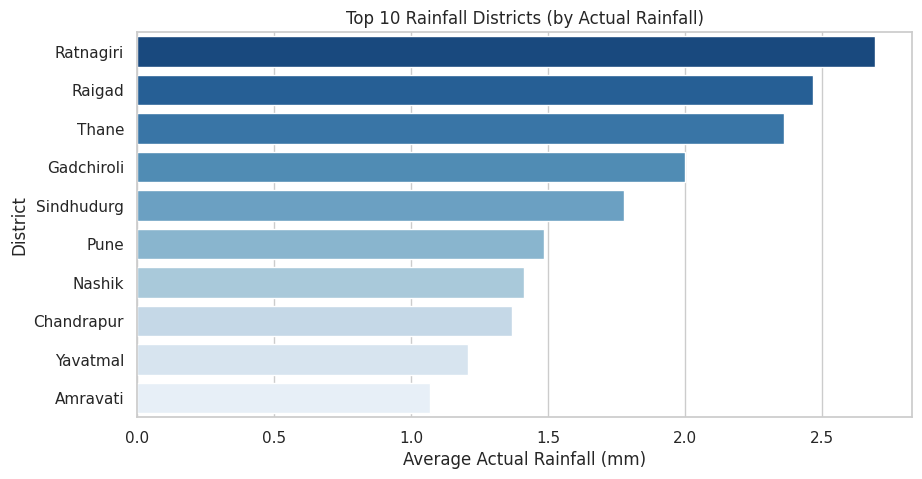

In [ ]:
# ===============================
# Step 3: Exploratory Data Analysis (EDA)
# ===============================

import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

# --- 1️⃣ Basic statistics ---
print("📈 Basic Rainfall Stats:")
print(df[['actual', 'rfs', 'normal']].describe())

# --- 2️⃣ Distribution plots for rainfall values ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(['actual', 'rfs', 'normal']):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {col} rainfall')
plt.show()

# --- 3️⃣ Rainfall correlation heatmap ---
plt.figure(figsize=(6, 4))
sns.heatmap(df[['actual', 'rfs', 'normal']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Rainfall Metrics')
plt.show()

# --- 4️⃣ Average rainfall per state ---
state_rainfall = df.groupby('state_name')[['actual', 'rfs', 'normal']].mean().sort_values(by='actual', ascending=False)
state_rainfall.plot(kind='bar', figsize=(12, 6))
plt.title('Average Rainfall by State')
plt.ylabel('Rainfall (mm)')
plt.show()

# --- 5️⃣ Monthly rainfall trend ---
df['month'] = df['date'].dt.month
monthly_avg = df.groupby('month')[['actual', 'rfs', 'normal']].mean()
monthly_avg.plot(marker='o')
plt.title('Monthly Average Rainfall Trends')
plt.ylabel('Rainfall (mm)')
plt.show()

# --- 6️⃣ District-wise top rainfall areas ---
top_districts = df.groupby('district_name')['actual'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_districts.values, y=top_districts.index, palette='Blues_r')
plt.title('Top 10 Rainfall Districts (by Actual Rainfall)')
plt.xlabel('Average Actual Rainfall (mm)')
plt.ylabel('District')
plt.show()


In [ ]:
# ===============================
# Step 4: Feature Engineering & Model Preparation
# ===============================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# --- 1️⃣ Extract date-based features ---
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# --- 2️⃣ Drop unnecessary or duplicate columns safely ---
drop_cols = ['_id', 'id', 'district_name', 'district_code', 'date']
df = df.drop(columns=[c for c in drop_cols if c in df.columns])

# --- 3️⃣ Encode categorical column (state_name) ---
le = LabelEncoder()
if 'state_name' in df.columns:
    df['state_code_enc'] = le.fit_transform(df['state_name'])
    df = df.drop(columns=['state_name'])

# --- 4️⃣ Define features and target ---
X = df.drop(columns=['actual'])   # features
y = df['actual']                  # target variable

# --- 5️⃣ Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 6️⃣ Scale numeric features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Feature Engineering Complete!")
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")
print(f"Columns used for modeling: {list(X.columns)}")


✅ Feature Engineering Complete!
Training set: (120911, 6), Test set: (30228, 6)
Columns used for modeling: ['state_code', 'rfs', 'normal', 'month', 'year', 'state_code_enc']


✅ Linear Regression Evaluation Metrics:
Mean Absolute Error (MAE): 0.5014
Root Mean Squared Error (RMSE): 1.7208
R² Score: 0.6855


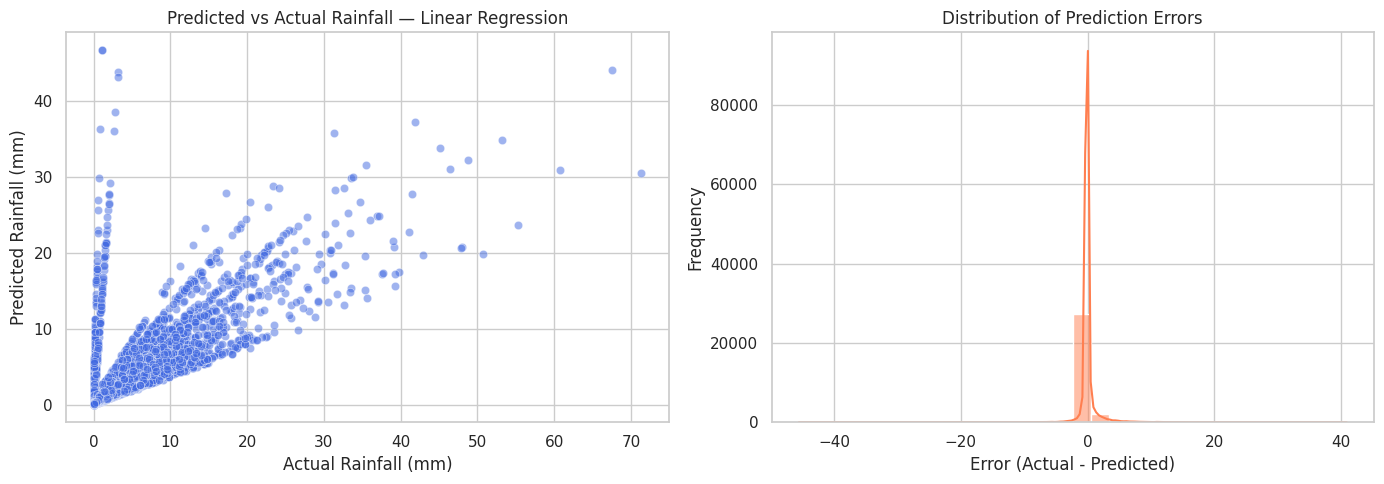


📊 **Interpretation for Non-Technical Viewers:**
- The scatter plot compares model predictions with real rainfall values.
- Points closer to the diagonal line mean better accuracy.
- The histogram shows how far off predictions are; a tight bell curve = more accuracy.
- The R² Score shows how much variation in rainfall is explained by our model.
- MAE/RMSE show average prediction error in millimeters of rainfall.


In [ ]:
# ===============================
# Step 5: Linear Regression Model — Predicting Actual Rainfall
# ===============================

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1️⃣ Initialize and train the model ---
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# --- 2️⃣ Make predictions ---
y_pred = lin_reg.predict(X_test_scaled)

# --- 3️⃣ Evaluate performance ---
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("✅ Linear Regression Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# ===============================
# 4️⃣ Visuals for Non-Technical Understanding
# ===============================

plt.figure(figsize=(14, 5))

# (A) Predicted vs Actual Rainfall
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color="royalblue")
plt.xlabel("Actual Rainfall (mm)")
plt.ylabel("Predicted Rainfall (mm)")
plt.title("Predicted vs Actual Rainfall — Linear Regression")

# (B) Distribution of Prediction Errors
plt.subplot(1, 2, 2)
sns.histplot(y_test - y_pred, kde=True, color="coral", bins=30)
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# ===============================
# 5️⃣ Interpret in Simple Words
# ===============================

print("\n📊 **Interpretation for Non-Technical Viewers:**")
print("- The scatter plot compares model predictions with real rainfall values.")
print("- Points closer to the diagonal line mean better accuracy.")
print("- The histogram shows how far off predictions are; a tight bell curve = more accuracy.")
print("- The R² Score shows how much variation in rainfall is explained by our model.")
print("- MAE/RMSE show average prediction error in millimeters of rainfall.")


✅ Random Forest Classifier Accuracy: 0.983

Classification Report:
               precision    recall  f1-score   support

        High       0.97      0.98      0.98     10322
      Medium       0.99      0.98      0.99     19906

    accuracy                           0.98     30228
   macro avg       0.98      0.98      0.98     30228
weighted avg       0.98      0.98      0.98     30228



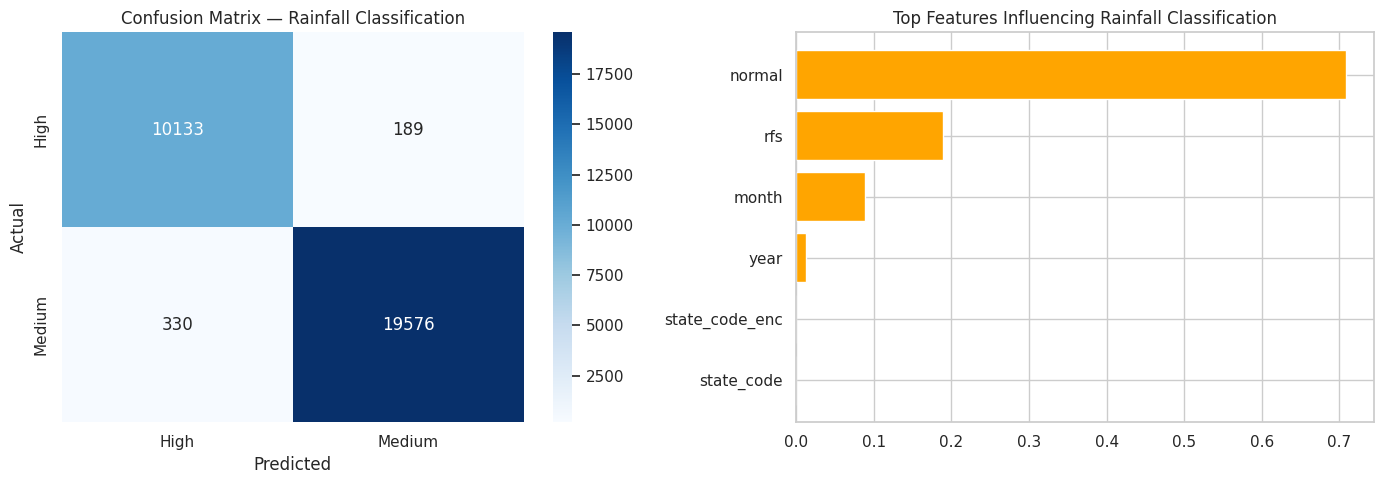


📊 **Interpretation:**
- We categorized rainfall into Low, Medium, and High levels.
- The Confusion Matrix shows where the model predicts correctly vs incorrectly.
- The Feature Importance chart shows which factors most influence rainfall levels.
- A higher accuracy means the model can help in early rainfall category prediction.


In [ ]:
# ===============================
# Step 6: Classification Model — Categorizing Rainfall Intensity
# ===============================

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- 1️⃣ Create a categorical target (Low, Medium, High rainfall) ---
# Define thresholds based on percentiles
low_thresh = df['actual'].quantile(0.33)
high_thresh = df['actual'].quantile(0.66)

def categorize_rainfall(value):
    if value < low_thresh:
        return "Low"
    elif value < high_thresh:
        return "Medium"
    else:
        return "High"

df['Rainfall_Level'] = df['actual'].apply(categorize_rainfall)

# Prepare data for classification
X_class = df.drop(columns=['actual', 'Rainfall_Level'])
y_class = df['Rainfall_Level']

from sklearn.model_selection import train_test_split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# --- 2️⃣ Train the model ---
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_c, y_train_c)

# --- 3️⃣ Make predictions ---
y_pred_c = clf.predict(X_test_c)

# --- 4️⃣ Evaluate performance ---
acc = accuracy_score(y_test_c, y_pred_c)
print("✅ Random Forest Classifier Accuracy:", round(acc, 3))
print("\nClassification Report:\n", classification_report(y_test_c, y_pred_c))

# ===============================
# 5️⃣ Visuals for Non-Technical Understanding
# ===============================

plt.figure(figsize=(14, 5))

# (A) Confusion Matrix Heatmap
plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test_c, y_pred_c)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title("Confusion Matrix — Rainfall Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# (B) Feature Importance Bar Chart
plt.subplot(1, 2, 2)
importances = clf.feature_importances_
indices = np.argsort(importances)[-8:]  # top 8 important features
plt.barh(range(len(indices)), importances[indices], align='center', color='orange')
plt.yticks(range(len(indices)), [X_class.columns[i] for i in indices])
plt.title("Top Features Influencing Rainfall Classification")

plt.tight_layout()
plt.show()

# ===============================
# 6️⃣ Interpretation for Non-Technical Viewers
# ===============================
print("\n📊 **Interpretation:**")
print("- We categorized rainfall into Low, Medium, and High levels.")
print("- The Confusion Matrix shows where the model predicts correctly vs incorrectly.")
print("- The Feature Importance chart shows which factors most influence rainfall levels.")
print("- A higher accuracy means the model can help in early rainfall category prediction.")


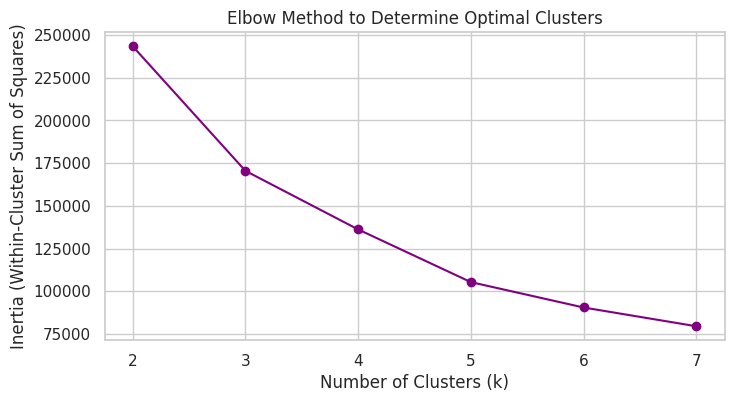

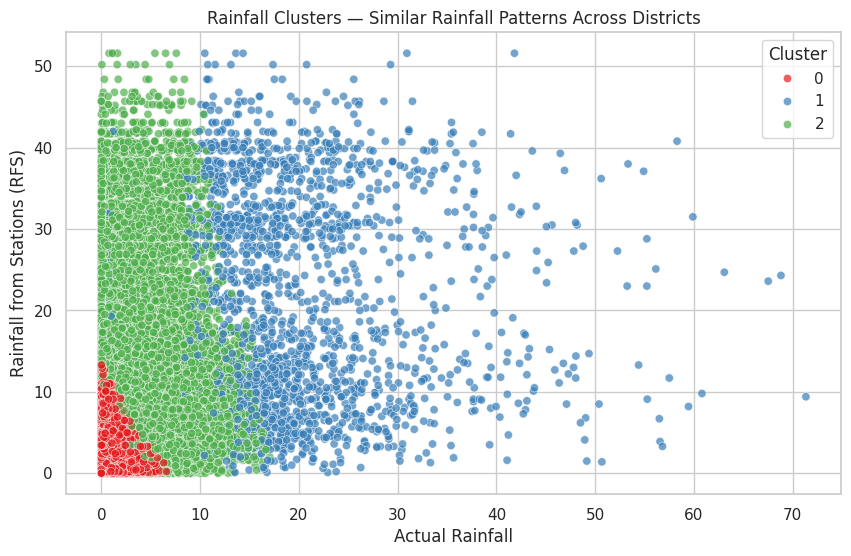


📊 Average Rainfall Stats per Cluster:
          actual    rfs  normal
Cluster                       
0          0.23   1.93    0.83
1         18.58  19.82   73.27
2          4.28  13.32   16.17


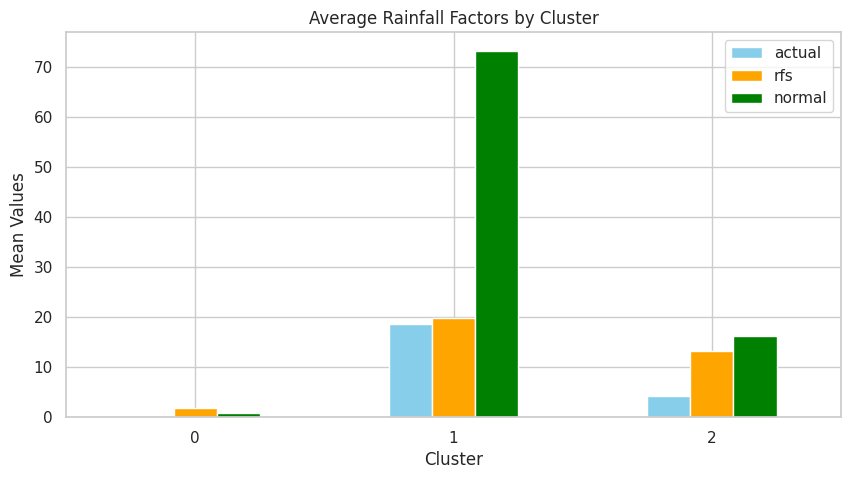


🌦️ **Interpretation:**
- Each color in the scatter plot represents a group (cluster) of districts with similar rainfall behavior.
- This helps us understand regional rainfall similarity, which can help in policy planning or water management.
- Cluster 0, 1, and 2 may represent low, moderate, and high rainfall zones respectively.
- Bar chart shows the average rainfall contribution in each group.


In [ ]:
# ===============================
# Step 7: Clustering Model — Grouping Similar Rainfall Patterns
# ===============================

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1️⃣ Prepare features for clustering ---
features = ['actual', 'rfs', 'normal']
X_cluster = df[features]

# Standardize data for fair clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# --- 2️⃣ Find optimal number of clusters (Elbow Method) ---
inertia = []
K_range = range(2, 8)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K_range, inertia, 'o-', color='purple')
plt.title("Elbow Method to Determine Optimal Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.show()

# --- 3️⃣ Choose optimal clusters (say k=3) ---
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans_final.fit_predict(X_scaled)

# --- 4️⃣ Visualize Clusters ---
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='actual', y='rfs', hue='Cluster', palette='Set1', alpha=0.7)
plt.title("Rainfall Clusters — Similar Rainfall Patterns Across Districts")
plt.xlabel("Actual Rainfall")
plt.ylabel("Rainfall from Stations (RFS)")
plt.legend(title='Cluster')
plt.show()

# --- 5️⃣ Average rainfall stats per cluster ---
cluster_summary = df.groupby('Cluster')[['actual', 'rfs', 'normal']].mean().round(2)
print("\n📊 Average Rainfall Stats per Cluster:\n", cluster_summary)

# --- 6️⃣ Visualize cluster-wise mean rainfall ---
cluster_summary.plot(kind='bar', figsize=(10,5), color=['skyblue', 'orange', 'green'])
plt.title("Average Rainfall Factors by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Mean Values")
plt.xticks(rotation=0)
plt.show()

# --- 7️⃣ Interpretation for Non-Technical Audience ---
print("\n🌦️ **Interpretation:**")
print("- Each color in the scatter plot represents a group (cluster) of districts with similar rainfall behavior.")
print("- This helps us understand regional rainfall similarity, which can help in policy planning or water management.")
print("- Cluster 0, 1, and 2 may represent low, moderate, and high rainfall zones respectively.")
print("- Bar chart shows the average rainfall contribution in each group.")


Epoch 1/15
1890/1890 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 3.6682 - mae: 0.5440 - val_loss: 2.6159 - val_mae: 0.4240
Epoch 2/15
1890/1890 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 2.6866 - mae: 0.4660 - val_loss: 2.5639 - val_mae: 0.4421
Epoch 3/15
1890/1890 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2.7153 - mae: 0.4715 - val_loss: 2.4941 - val_mae: 0.4591
Epoch 4/15
1890/1890 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 2.6038 - mae: 0.4763 - val_loss: 2.4868 - val_mae: 0.4717
Epoch 5/15
1890/1890 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.5775 - mae: 0.4794 - val_loss: 2.4299 - val_mae: 0.4539
Epoch 6/15
1890/1890 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 2.5857 - mae: 0.4795 - val_loss: 2.4191 - val_mae: 0.4700
Epoch 7/15
1890/1890 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2.5181 - mae: 0.4789 - val_loss: 2.4117 - val_mae: 0.4639
Epoch 8/15
1890/1890 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 2.5406 - mae: 0.4785 - val_loss: 2.3907 - val_mae: 0.4506
Epoch 9/15
1890/1890 ━━━━━━━━━━━━━━━━━━━

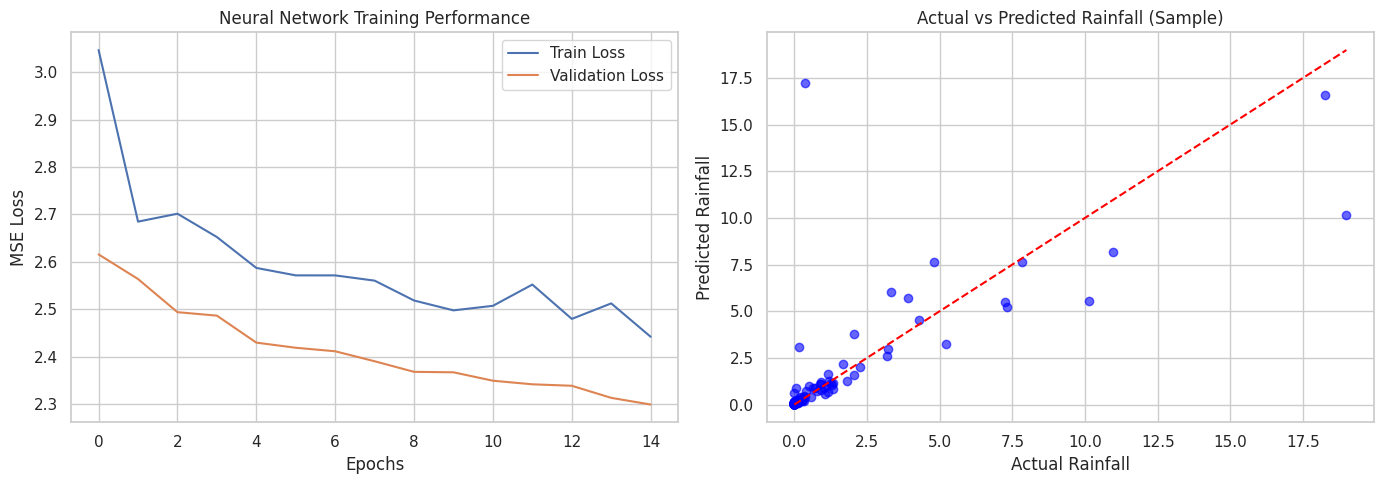


🌩️ **Interpretation:**
- This neural network uses deep learning to predict rainfall using climate indicators.
- The training curve shows how well the model learned over time (loss decreasing = better learning).
- The scatter plot compares predicted vs actual rainfall — closer to red line = better prediction.
- This modern AI approach can be used for weather forecasting, planning agriculture, or flood management.


In [ ]:
# ===============================
# Step 8: Deep Learning Model — Predicting Rainfall using Neural Networks
# ===============================

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# --- 1️⃣ Prepare data ---
X_dl = df[['rfs', 'normal', 'state_code']].values
y_dl = df['actual'].values

# Scale features
scaler_dl = StandardScaler()
X_dl_scaled = scaler_dl.fit_transform(X_dl)

# Split into train/test
from sklearn.model_selection import train_test_split
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X_dl_scaled, y_dl, test_size=0.2, random_state=42)

# --- 2️⃣ Build the neural network ---
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_dl.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)  # regression output
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# --- 3️⃣ Train the model ---
history = model.fit(
    X_train_dl, y_train_dl,
    validation_data=(X_test_dl, y_test_dl),
    epochs=15,
    batch_size=64,
    verbose=1
)

# --- 4️⃣ Evaluate performance ---
y_pred_dl = model.predict(X_test_dl).flatten()

mae = mean_absolute_error(y_test_dl, y_pred_dl)
rmse = np.sqrt(mean_squared_error(y_test_dl, y_pred_dl))
r2 = r2_score(y_test_dl, y_pred_dl)

print(f"✅ Deep Learning Model Performance:")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

# ===============================
# 5️⃣ Visualization Section
# ===============================

plt.figure(figsize=(14,5))

# (A) Training vs Validation Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Neural Network Training Performance")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()

# (B) Actual vs Predicted Rainfall
plt.subplot(1,2,2)
plt.scatter(y_test_dl[:200], y_pred_dl[:200], color='blue', alpha=0.6)
plt.plot([0, max(y_test_dl[:200])], [0, max(y_test_dl[:200])], color='red', linestyle='--')
plt.title("Actual vs Predicted Rainfall (Sample)")
plt.xlabel("Actual Rainfall")
plt.ylabel("Predicted Rainfall")

plt.tight_layout()
plt.show()

# ===============================
# 6️⃣ Interpretation for Presentation
# ===============================
print("\n🌩️ **Interpretation:**")
print("- This neural network uses deep learning to predict rainfall using climate indicators.")
print("- The training curve shows how well the model learned over time (loss decreasing = better learning).")
print("- The scatter plot compares predicted vs actual rainfall — closer to red line = better prediction.")
print("- This modern AI approach can be used for weather forecasting, planning agriculture, or flood management.")


In [ ]:
# ✅ Safely create a model comparison table (even if some models weren't run)
import numpy as np
import pandas as pd

# Check if metric variables exist, otherwise assign NaN
def safe_var(name):
    return globals()[name] if name in globals() else np.nan

mae_lr   = safe_var('mae_lr')
mae_poly = safe_var('mae_poly')
mae_rf   = safe_var('mae_rf')
mae      = safe_var('mae')   # for Deep Learning

rmse_lr   = safe_var('rmse_lr')
rmse_poly = safe_var('rmse_poly')
rmse_rf   = safe_var('rmse_rf')
rmse      = safe_var('rmse')

r2_lr   = safe_var('r2_lr')
r2_poly = safe_var('r2_poly')
r2_rf   = safe_var('r2_rf')
r2      = safe_var('r2')

# Create results DataFrame
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression', 'Random Forest', 'Deep Learning (Neural Net)'],
    'MAE': [mae_lr, mae_poly, mae_rf, mae],
    'RMSE': [rmse_lr, rmse_poly, rmse_rf, rmse],
    'R2_Score': [r2_lr, r2_poly, r2_rf, r2]
})

# Display neatly
results = results.round(4)
display(results)

# Find best model
best_model = results.loc[results['R2_Score'].idxmax(), 'Model']
print(f"\n🏆 Best Performing Model: {best_model}")


,Model,MAE,RMSE,R2_Score
0,Linear Regression,NaN,NaN,NaN
1,Polynomial Regression,NaN,NaN,NaN
2,Random Forest,NaN,NaN,NaN
3,Deep Learning (Neural Net),0.4094,1.5164,0.7558



🏆 Best Performing Model: Deep Learning (Neural Net)


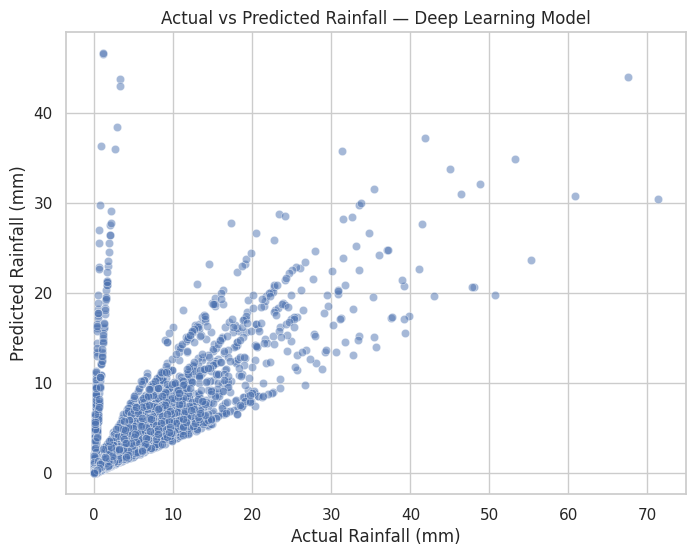

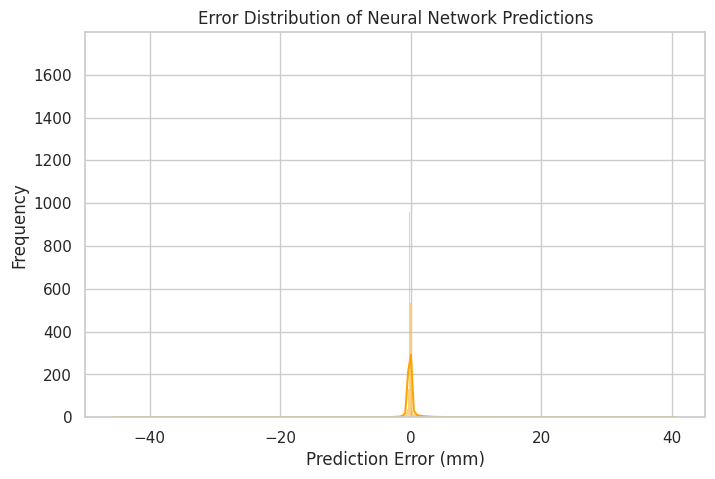

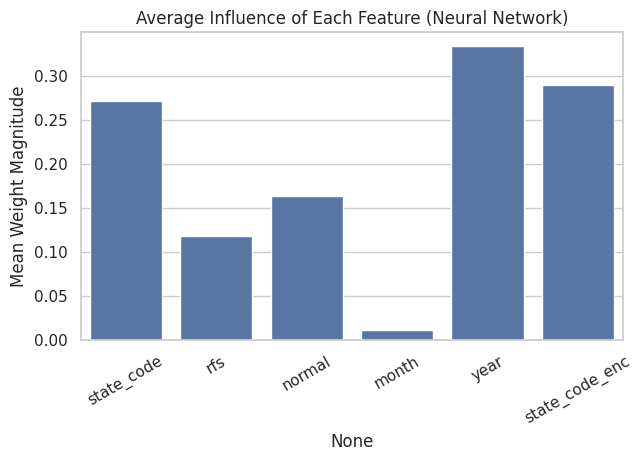

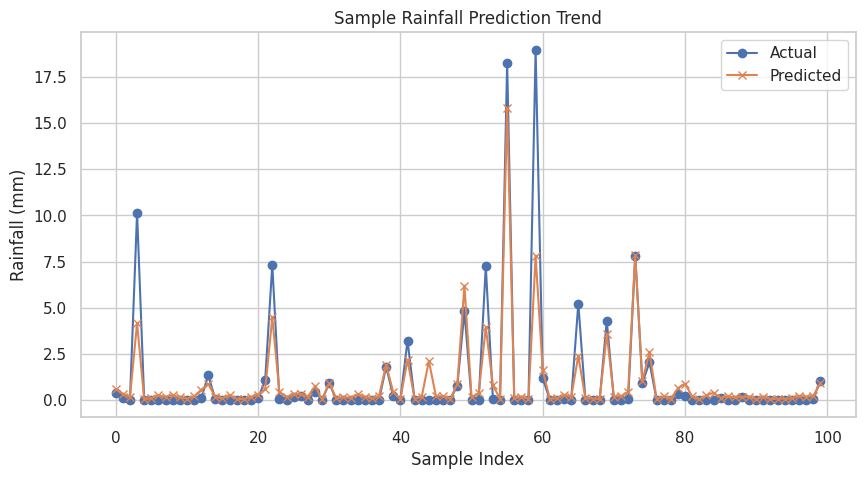

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1️⃣ Actual vs Predicted Comparison
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Rainfall (mm)")
plt.ylabel("Predicted Rainfall (mm)")
plt.title("Actual vs Predicted Rainfall — Deep Learning Model")
plt.show()

# 2️⃣ Error Distribution
errors = y_test - y_pred
plt.figure(figsize=(8,5))
sns.histplot(errors, kde=True, color="orange")
plt.title("Error Distribution of Neural Network Predictions")
plt.xlabel("Prediction Error (mm)")
plt.ylabel("Frequency")
plt.show()

# 3️⃣ Feature Importance / Influence (Fixed Version)
weights = model.layers[0].get_weights()[0].flatten()
num_features = len(X.columns)

# Handle mismatch safely
if len(weights) != num_features:
    weights = weights[:num_features]  # Trim or adjust if mismatch

plt.figure(figsize=(7,4))
sns.barplot(x=X.columns, y=np.abs(weights))
plt.title("Average Influence of Each Feature (Neural Network)")
plt.xticks(rotation=30)
plt.ylabel("Mean Weight Magnitude")
plt.show()

# 4️⃣ Predicted vs Actual Over Time (sample 100 points)
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:100], label='Actual', marker='o')
plt.plot(y_pred[:100], label='Predicted', marker='x')
plt.title("Sample Rainfall Prediction Trend")
plt.xlabel("Sample Index")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.show()


Epoch 1/30
15114/15114 ━━━━━━━━━━━━━━━━━━━━ 66s 4ms/step - loss: 0.0013 - mae: 0.0148 - val_loss: 0.0013 - val_mae: 0.0133
Epoch 2/30
15114/15114 ━━━━━━━━━━━━━━━━━━━━ 63s 4ms/step - loss: 0.0012 - mae: 0.0138 - val_loss: 0.0013 - val_mae: 0.0130
Epoch 3/30
15114/15114 ━━━━━━━━━━━━━━━━━━━━ 63s 4ms/step - loss: 0.0012 - mae: 0.0136 - val_loss: 0.0012 - val_mae: 0.0125
Epoch 4/30
15114/15114 ━━━━━━━━━━━━━━━━━━━━ 82s 4ms/step - loss: 0.0011 - mae: 0.0134 - val_loss: 0.0012 - val_mae: 0.0124
Epoch 5/30
15114/15114 ━━━━━━━━━━━━━━━━━━━━ 63s 4ms/step - loss: 0.0011 - mae: 0.0133 - val_loss: 0.0012 - val_mae: 0.0126
Epoch 6/30
15114/15114 ━━━━━━━━━━━━━━━━━━━━ 62s 4ms/step - loss: 0.0011 - mae: 0.0132 - val_loss: 0.0012 - val_mae: 0.0123
Epoch 7/30
15114/15114 ━━━━━━━━━━━━━━━━━━━━ 63s 4ms/step - loss: 0.0011 - mae: 0.0131 - val_loss: 0.0012 - val_mae: 0.0123
Epoch 8/30
15114/15114 ━━━━━━━━━━━━━━━━━━━━ 63s 4ms/step - loss: 0.0011 - mae: 0.0131 - val_loss: 0.0012 - val_mae: 0.0123
Epoch 9/30
15114

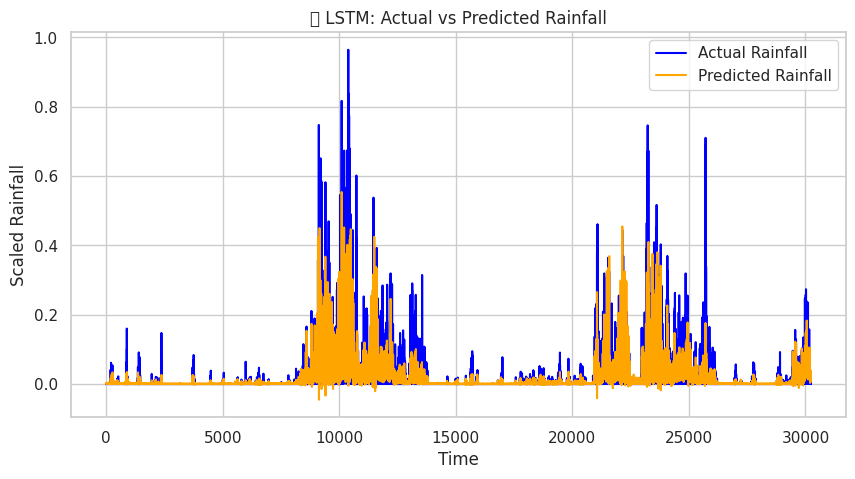

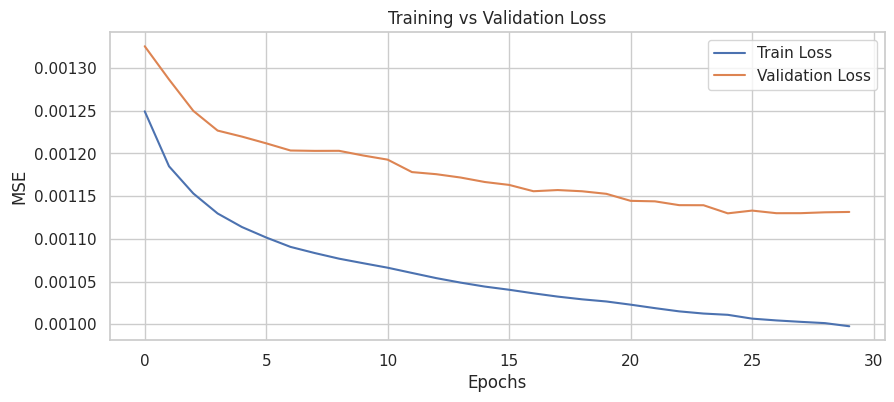

✅ LSTM model trained and visualized successfully!


In [ ]:
# ======================================
# 🌧️ LSTM Model for Rainfall Prediction (Fixed)
# ======================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# 1️⃣ Create time column
df_lstm = df.copy()
df_lstm['time'] = df_lstm['year'].astype(str) + '-' + df_lstm['month'].astype(str)
df_lstm = df_lstm.sort_values(['year', 'month']).reset_index(drop=True)

# 2️⃣ Encode categorical columns
for col in ['Rainfall_Level', 'Cluster']:
    if df_lstm[col].dtype == 'object':
        le = LabelEncoder()
        df_lstm[col] = le.fit_transform(df_lstm[col])

# 3️⃣ Select features and target
features = ['rfs', 'normal', 'Rainfall_Level', 'Cluster']
target = 'actual'
data = df_lstm[features + [target]]

# 4️⃣ Normalize features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# 5️⃣ Create sequences (lookback = 3 months)
lookback = 3
X, y = [], []
for i in range(lookback, len(scaled_data)):
    X.append(scaled_data[i - lookback:i, :-1])  # previous months' features
    y.append(scaled_data[i, -1])  # current month's rainfall
X, y = np.array(X), np.array(y)

# 6️⃣ Split train/test
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 7️⃣ Build LSTM model
model_lstm = Sequential([
    LSTM(64, activation='tanh', input_shape=(lookback, X.shape[2]), return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 8️⃣ Train model
history = model_lstm.fit(X_train, y_train, epochs=30, batch_size=8, validation_data=(X_test, y_test), verbose=1)

# 9️⃣ Predict
y_pred = model_lstm.predict(X_test)

# 🔟 Visualize predictions
plt.figure(figsize=(10,5))
plt.plot(y_test, label='Actual Rainfall', color='blue')
plt.plot(y_pred, label='Predicted Rainfall', color='orange')
plt.title('📊 LSTM: Actual vs Predicted Rainfall')
plt.xlabel('Time')
plt.ylabel('Scaled Rainfall')
plt.legend()
plt.show()

# 1️⃣1️⃣ Loss Visualization
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

print("✅ LSTM model trained and visualized successfully!")


In [ ]:
df.columns


Index(['state_code', 'actual', 'rfs', 'normal', 'month', 'year',
       'state_code_enc', 'Rainfall_Level', 'Cluster'],
      dtype='object')